# Lab Work: Developing and Comparing AI Models for Android Malware Detection

## Objective:
The goal of this lab is to develop and evaluate multiple AI models for detecting Android malware using the provided Android Malware Dataset. Students will choose at least three different machine learning or deep learning algorithms to compare their performance in classifying Android applications as benign or malicious.

## Dataset Overview:
The **Android Malware Dataset for Machine Learning** contains labeled Android APK samples, classified as benign (goodware) or malicious (e.g., adware, spyware, trojans). It includes various features extracted from the APKs, such as requested permissions, API calls, system behaviors, and more, which can be used to train machine learning models.

## Tasks:

1. **Data Preprocessing**:
   - Load the dataset and clean it by handling missing values and converting categorical features into numerical ones if necessary.
   - Split the data into training and testing sets.

2. **Model Development**:
   - Choose at least **three AI algorithms** of your choice (e.g., Logistic Regression, Random Forest, SVM, Neural Networks, XGBoost, etc.).
   - Train each model on the dataset and evaluate their performance using accuracy, precision, recall, F1-score, and confusion matrix.

3. **Model Comparison**:
   - Compare the models based on their performance metrics.
   - Analyze which model performs best and why.

4. **Optional (Hyperparameter Tuning)**:
   - Optionally, apply techniques like grid search to optimize the model’s hyperparameters.


## Resources:
- Kaggle Dataset: [Android Malware Dataset for Machine Learning](https://www.kaggle.com/datasets/shashwatwork/android-malware-dataset-for-machine-learning)

You need to login in Kaggle to get access to the dataset.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load dataset
df = pd.read_csv('android_malware.csv')  # replace with actual path

# Check for missing values
df = df.dropna()
print(df.columns)



Index(['transact', 'onServiceConnected', 'bindService', 'attachInterface',
       'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.lang.Class.cast',
       ...
       'READ_CONTACTS', 'DEVICE_POWER', 'HARDWARE_TEST', 'ACCESS_WIFI_STATE',
       'WRITE_EXTERNAL_STORAGE', 'ACCESS_FINE_LOCATION', 'SET_WALLPAPER_HINTS',
       'SET_PREFERRED_APPLICATIONS', 'WRITE_SECURE_SETTINGS', 'class'],
      dtype='object', length=216)


C:\Users\HP\AppData\Local\Temp\ipykernel_2876\3009421986.py:2: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('android_malware.csv')  # replace with actual path


In [6]:
X = df.drop('class', axis=1)
y = df['class']


In [10]:
# Convert labels to numeric
y = df['class'].map({'B': 0, 'S': 1})


In [11]:
X = X.apply(pd.to_numeric, errors='coerce')  # convert everything to numeric
X = X.fillna(0)  # fill NaNs caused by conversion


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


=== Random Forest Classifier Metrics ===
Accuracy:  0.9877
Precision: 0.9929
Recall:    0.9747
F1 Score:  0.9837

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1863
           1       0.99      0.97      0.98      1145

    accuracy                           0.99      3008
   macro avg       0.99      0.99      0.99      3008
weighted avg       0.99      0.99      0.99      3008



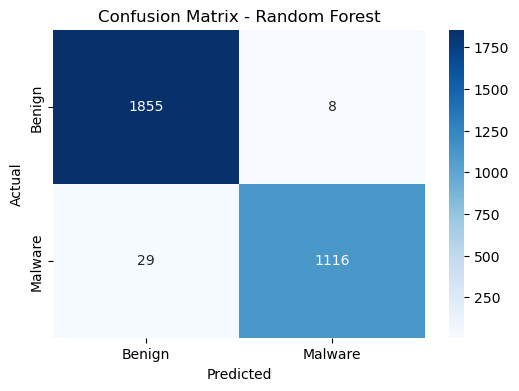

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
rf_preds = rf_model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, rf_preds)
prec = precision_score(y_test, rf_preds)
rec = recall_score(y_test, rf_preds)
f1 = f1_score(y_test, rf_preds)

print("=== Random Forest Classifier Metrics ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, rf_preds))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


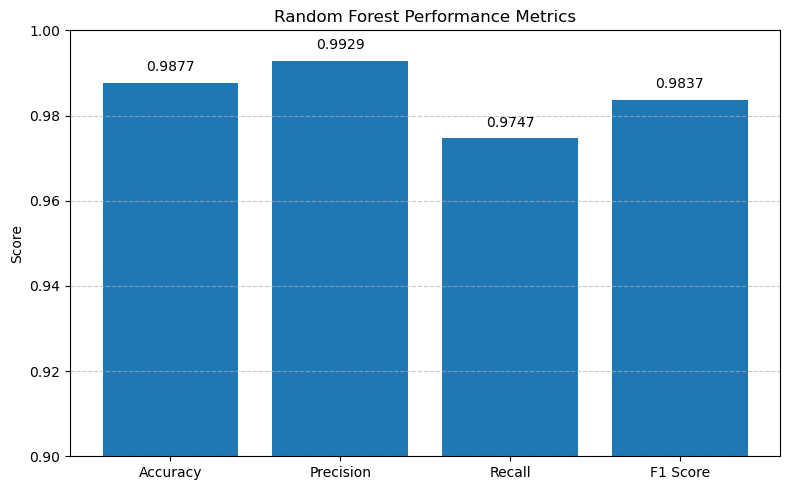

In [14]:
import matplotlib.pyplot as plt

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.9877, 0.9929, 0.9747, 0.9837]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values)
plt.ylim(0.9, 1.0)
plt.title('Random Forest Performance Metrics')
plt.ylabel('Score')

# Add values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.002, f'{yval:.4f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [15]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_acc = accuracy_score(y_test, lr_preds)
lr_prec = precision_score(y_test, lr_preds)
lr_rec = recall_score(y_test, lr_preds)
lr_f1 = f1_score(y_test, lr_preds)


In [17]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluation
xgb_acc = accuracy_score(y_test, xgb_preds)
xgb_prec = precision_score(y_test, xgb_preds)
xgb_rec = recall_score(y_test, xgb_preds)
xgb_f1 = f1_score(y_test, xgb_preds)


In [18]:
# Random Forest (from earlier)
rf_acc = 0.9877
rf_prec = 0.9929
rf_rec = 0.9747
rf_f1 = 0.9837

# Model comparison table
import pandas as pd

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [lr_acc, rf_acc, xgb_acc],
    'Precision': [lr_prec, rf_prec, xgb_prec],
    'Recall': [lr_rec, rf_rec, xgb_rec],
    'F1 Score': [lr_f1, rf_f1, xgb_f1]
})

print(results)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.974734   0.975957  0.957205  0.966490
1        Random Forest  0.987700   0.992900  0.974700  0.983700
2              XGBoost  0.987035   0.985940  0.979913  0.982917


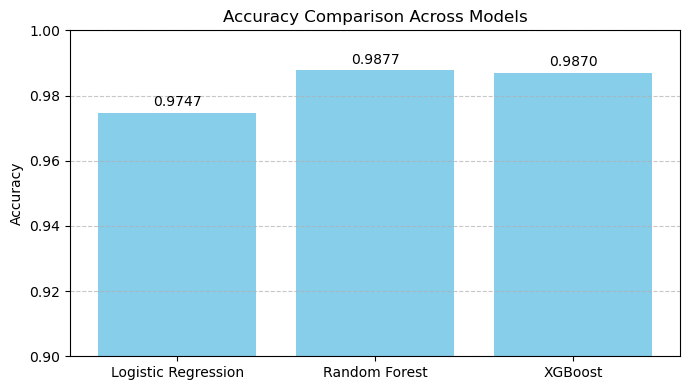

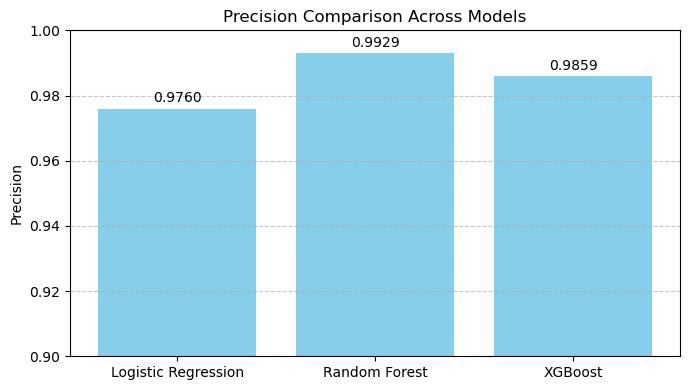

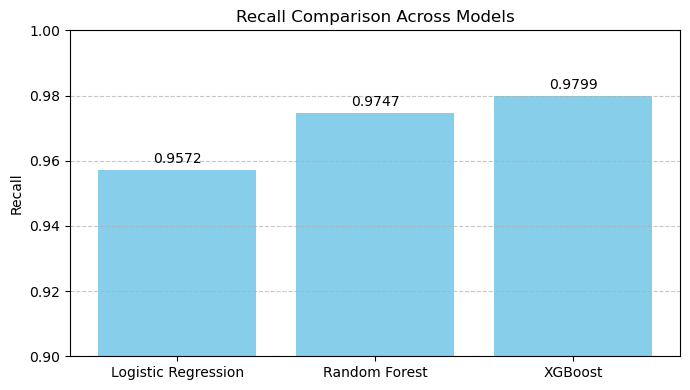

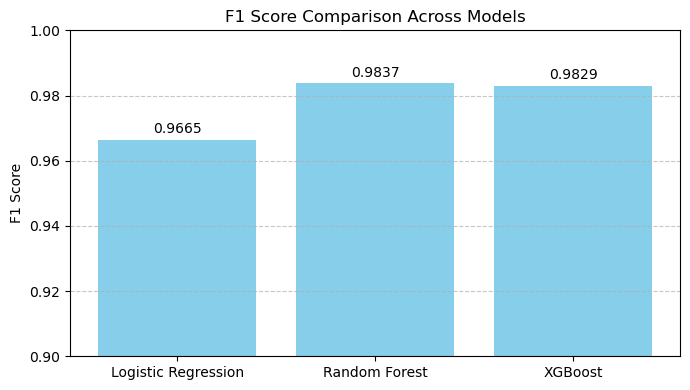

In [19]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.figure(figsize=(7, 4))
    plt.bar(results['Model'], results[metric], color='skyblue')
    plt.title(f'{metric} Comparison Across Models')
    plt.ylabel(metric)
    plt.ylim(0.9, 1.0)
    for i, v in enumerate(results[metric]):
        plt.text(i, v + 0.002, f"{v:.4f}", ha='center')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


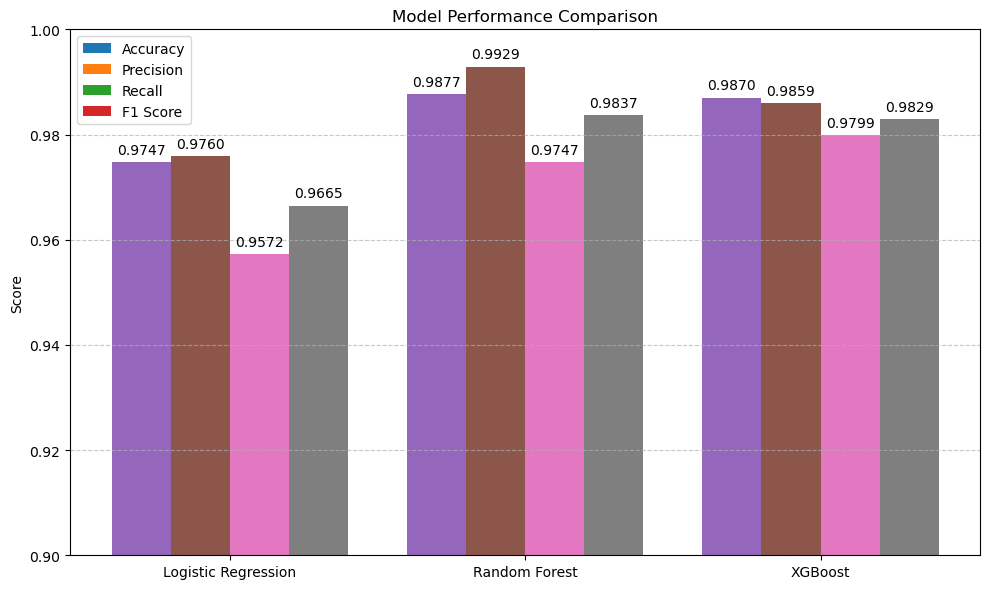

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Metric values
models = ['Logistic Regression', 'Random Forest', 'XGBoost']

accuracy = [lr_acc, rf_acc, xgb_acc]
precision = [lr_prec, rf_prec, xgb_prec]
recall = [lr_rec, rf_rec, xgb_rec]
f1 = [lr_f1, rf_f1, xgb_f1]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1 Score')

# Labeling
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.ylim(0.9, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show values on bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                 f'{height:.4f}', ha='center', va='bottom')

# Add values for each group
for bars in [plt.bar(x - 1.5*width, accuracy, width),
             plt.bar(x - 0.5*width, precision, width),
             plt.bar(x + 0.5*width, recall, width),
             plt.bar(x + 1.5*width, f1, width)]:
    autolabel(bars)

plt.tight_layout()
plt.show()


**Lab Logbook requirement**: Provide a graph comparing the performance of the AI model that you have developed.